In [40]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
from IPython.display import Image


In [41]:
EPOCHS = 1
BATCH_SIZE = 100
LEARNING_RATE = 0.0005

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64 
        self.pool = nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [43]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.MNIST(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=BATCH_SIZE,
                                            shuffle=False, 
                                            num_workers=2)

classes = tuple(np.linspace(0, 9, 10, dtype=np.uint8))

In [44]:
net = Net()
device = torch.device("cuda")
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),
                      lr=LEARNING_RATE, momentum=0.99, nesterov=True)

In [ ]:
for epoch in range(EPOCHS):
    print("+++ epoch {:d} +++".format(epoch))
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print("   iteration{:5d} ---> loss: {:.3f}"
                  .format(i+1, running_loss/100))
            running_loss = 0.0
    print("")
print('Finished Training')

+++ epoch 0 +++
   iteration  100 ---> loss: 2.116
   iteration  200 ---> loss: 0.928
   iteration  300 ---> loss: 0.552
   iteration  400 ---> loss: 0.433
   iteration  500 ---> loss: 0.373
   iteration  600 ---> loss: 0.350

Finished Training


Predicted Label :  7
GT Label :  7


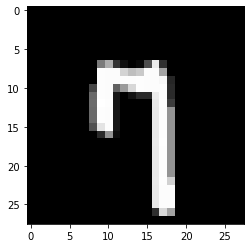

In [56]:
index = random.randint(0, 99)
test_iter = iter(testloader)
inputs, labels = test_iter.next()
inputs = inputs.to(device)
outputs = net(inputs)
_, predicted = torch.max(outputs.data, 1)
plt.imshow(inputs[index].to('cpu').detach().numpy().copy().reshape(28, 28), cmap='gray')
print("Predicted Label : ", predicted[index].item())
print("GT Label : ", labels[index].item())
